![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 4: Network Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [1]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community
import pandas

plt.rc("savefig", dpi=300) # improve default resolution of graphics
sns.set(font_scale=.75)

In [2]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
RC1014 = RC.yearSplit(2010,2014)

## Co-Author Networks

* produce network from record collection
* get quick stats

In [3]:
coauth_net = RC.networkCoAuthor() 
print(mk.graphStats(coauth_net))

The graph has 10104 nodes, 15507 edges, 1111 isolates, 0 self loops, a density of 0.000303818 and a transitivity of 0.555409


* modify network object in memory by dropping edges and self-loops
* modify network object by extracting the giant component (e.g. of *networkx*)

In [4]:
mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True) 
giant_coauth = max(nx.connected_component_subgraphs(coauth_net), key=len)
print(mk.graphStats(giant_coauth))

The graph has 265 nodes, 443 edges, 0 isolates, 0 self loops, a density of 0.0126644 and a transitivity of 0.285714


Of course we can use other *networkx* functions, such as computing centralities and global network properties.

In [5]:
deg = nx.degree_centrality(giant_coauth)
eig = nx.eigenvector_centrality(giant_coauth)

In [6]:
cent_df = pandas.DataFrame.from_dict([deg, eig])
cent_df = pandas.DataFrame.transpose(cent_df)
cent_df.columns = ['degree', 'eigenvector']
cent_df[:10]

degree   eigenvector
Abrizah, A.               0.007576  2.247156e-05
Albarran, Pedro           0.011364  5.906076e-07
Archambault, Eric         0.011364  1.818886e-04
Arencibia-Jorge, Ricardo  0.003788  4.431288e-04
Arora, Sanjay K.          0.007576  1.219429e-05
Arsenault, Clement        0.007576  3.405122e-05
Bar-Ilan, Judit           0.022727  2.385037e-05
Barjak, Franz             0.003788  2.244758e-05
Barnett, George A.        0.003788  1.801193e-03
Bauer, Johann             0.003788  3.188824e-02

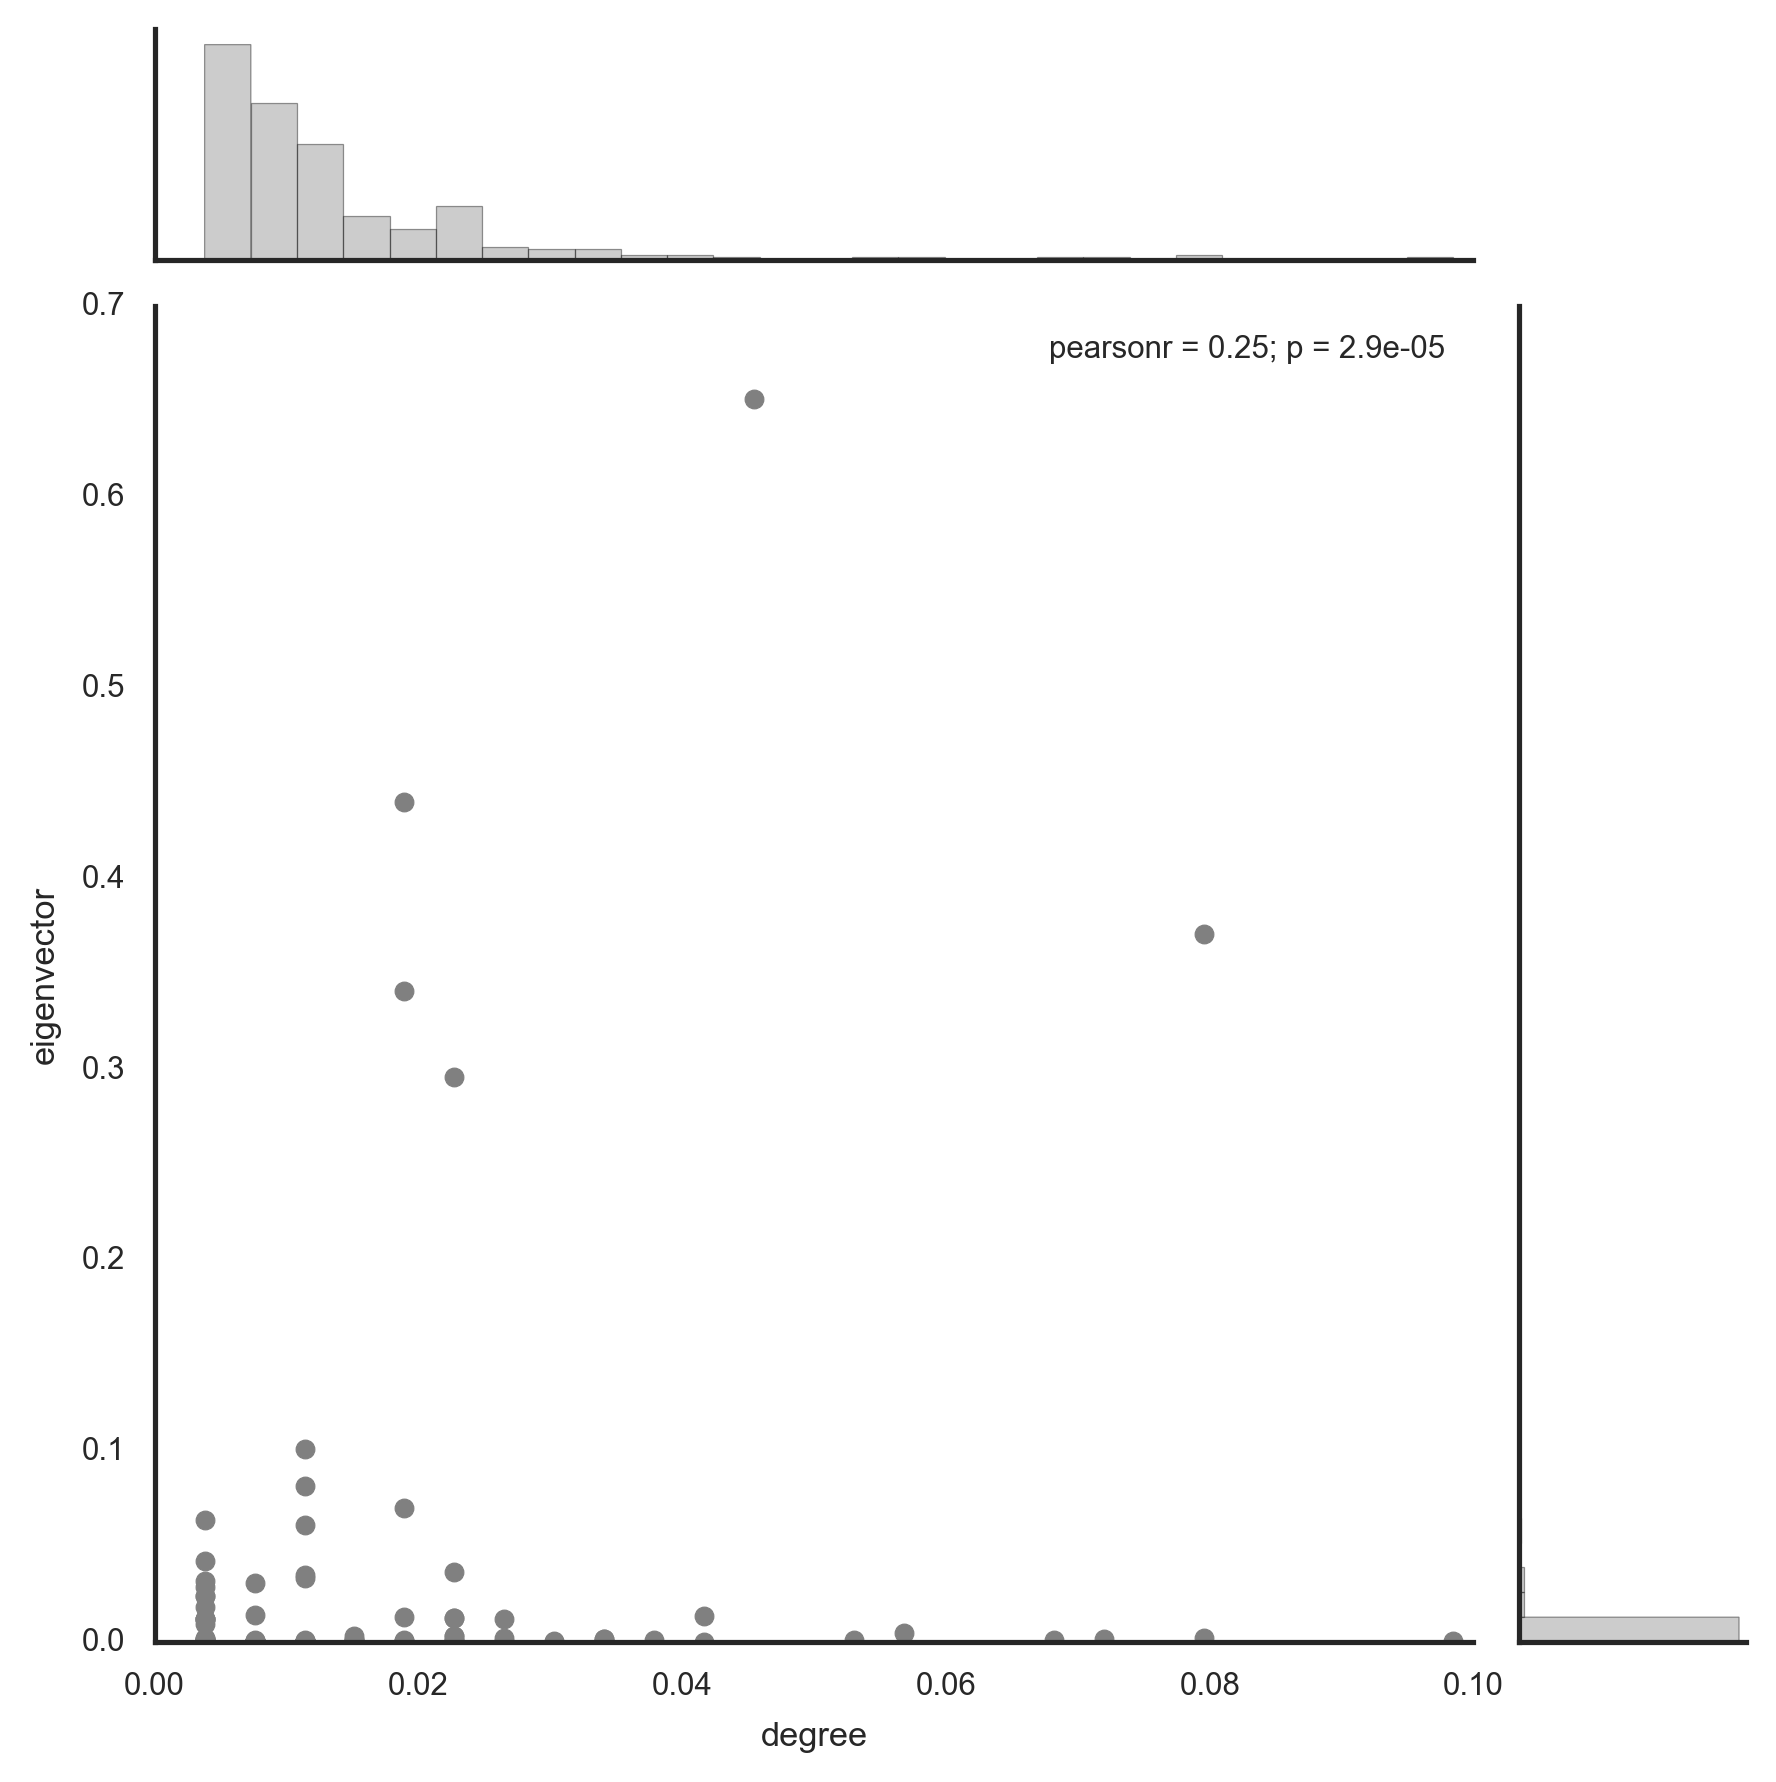

In [7]:
with sns.axes_style('white'):
    sns.jointplot(x='degree', y='eigenvector', data=cent_df, xlim = (0, .1), ylim = (0, .7), color = 'gray')
    sns.despine()
plt.savefig('figures/cent_scatterplot.pdf')

*Networkx* does an adequete job of creating static visualizations of networks, provided they are not too large.

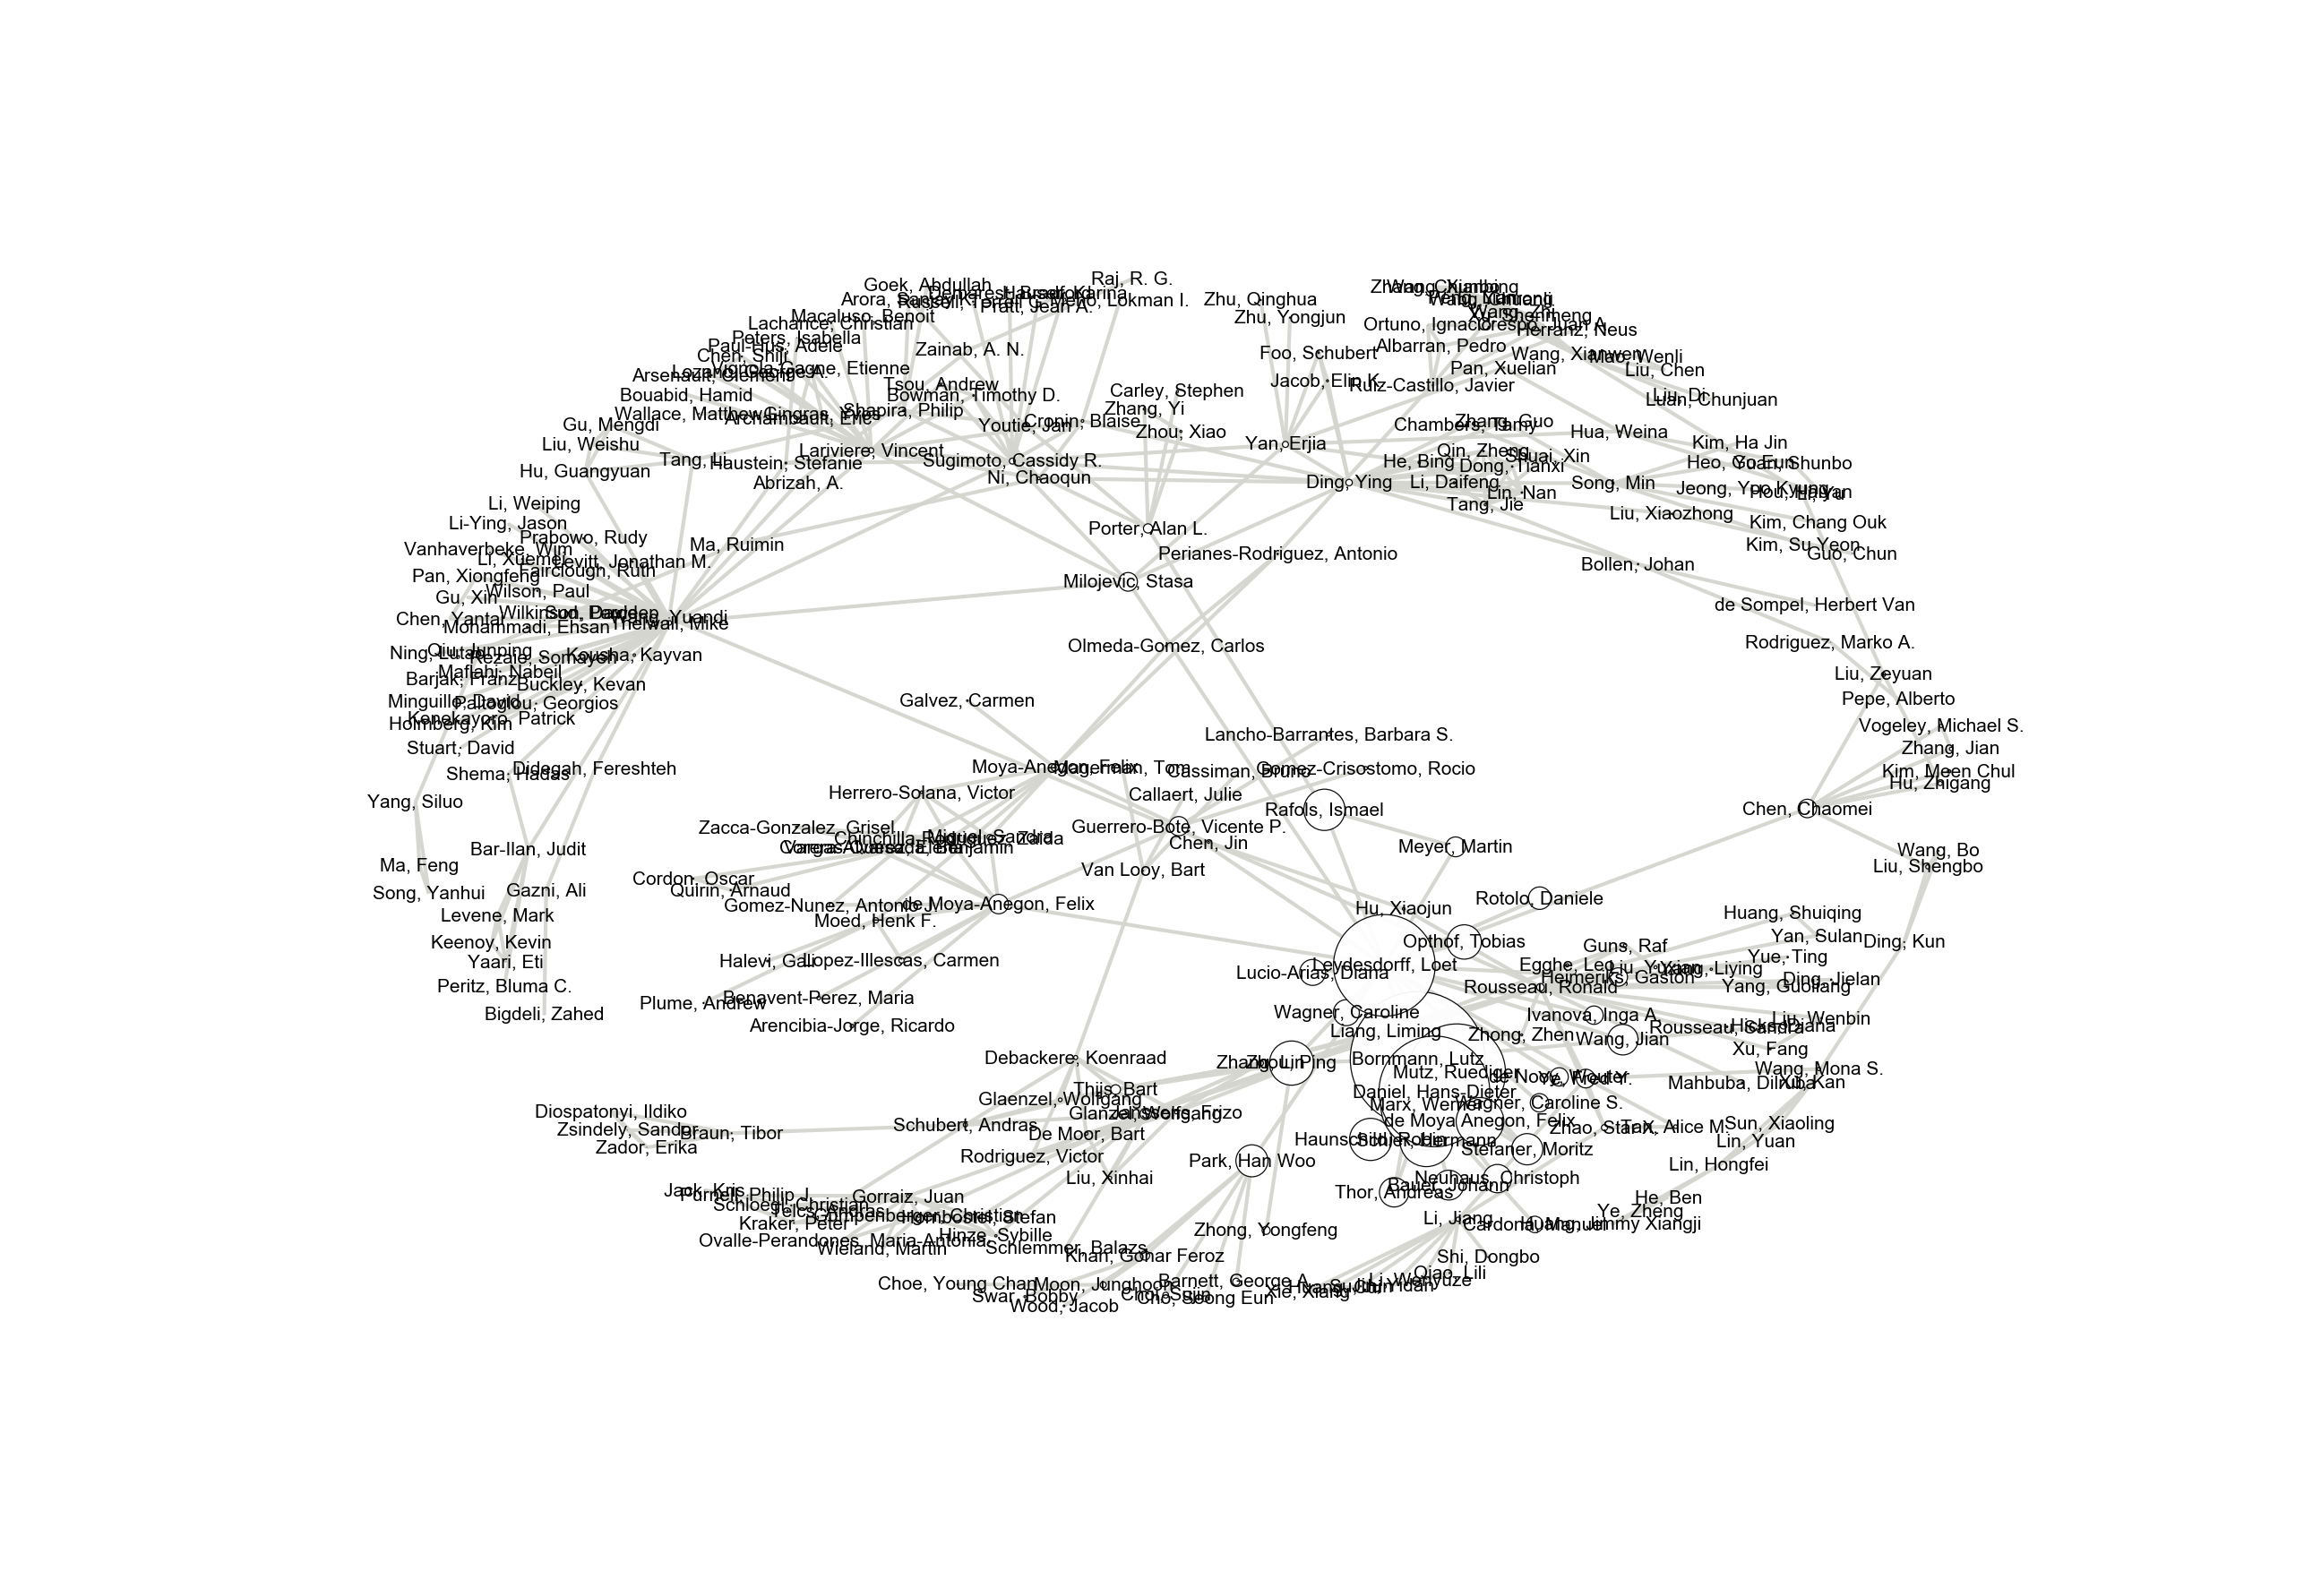

In [8]:
eig = nx.eigenvector_centrality(giant_coauth)
size = [2000 * eig[node] for node in giant_coauth]

nx.draw_spring(giant_coauth, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coauthors.pdf')

* use the *community* package to compute modularity and detect community structure in the network

In [9]:
partition = community.best_partition(giant_coauth)
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

Modularity: 0.8392105301376751


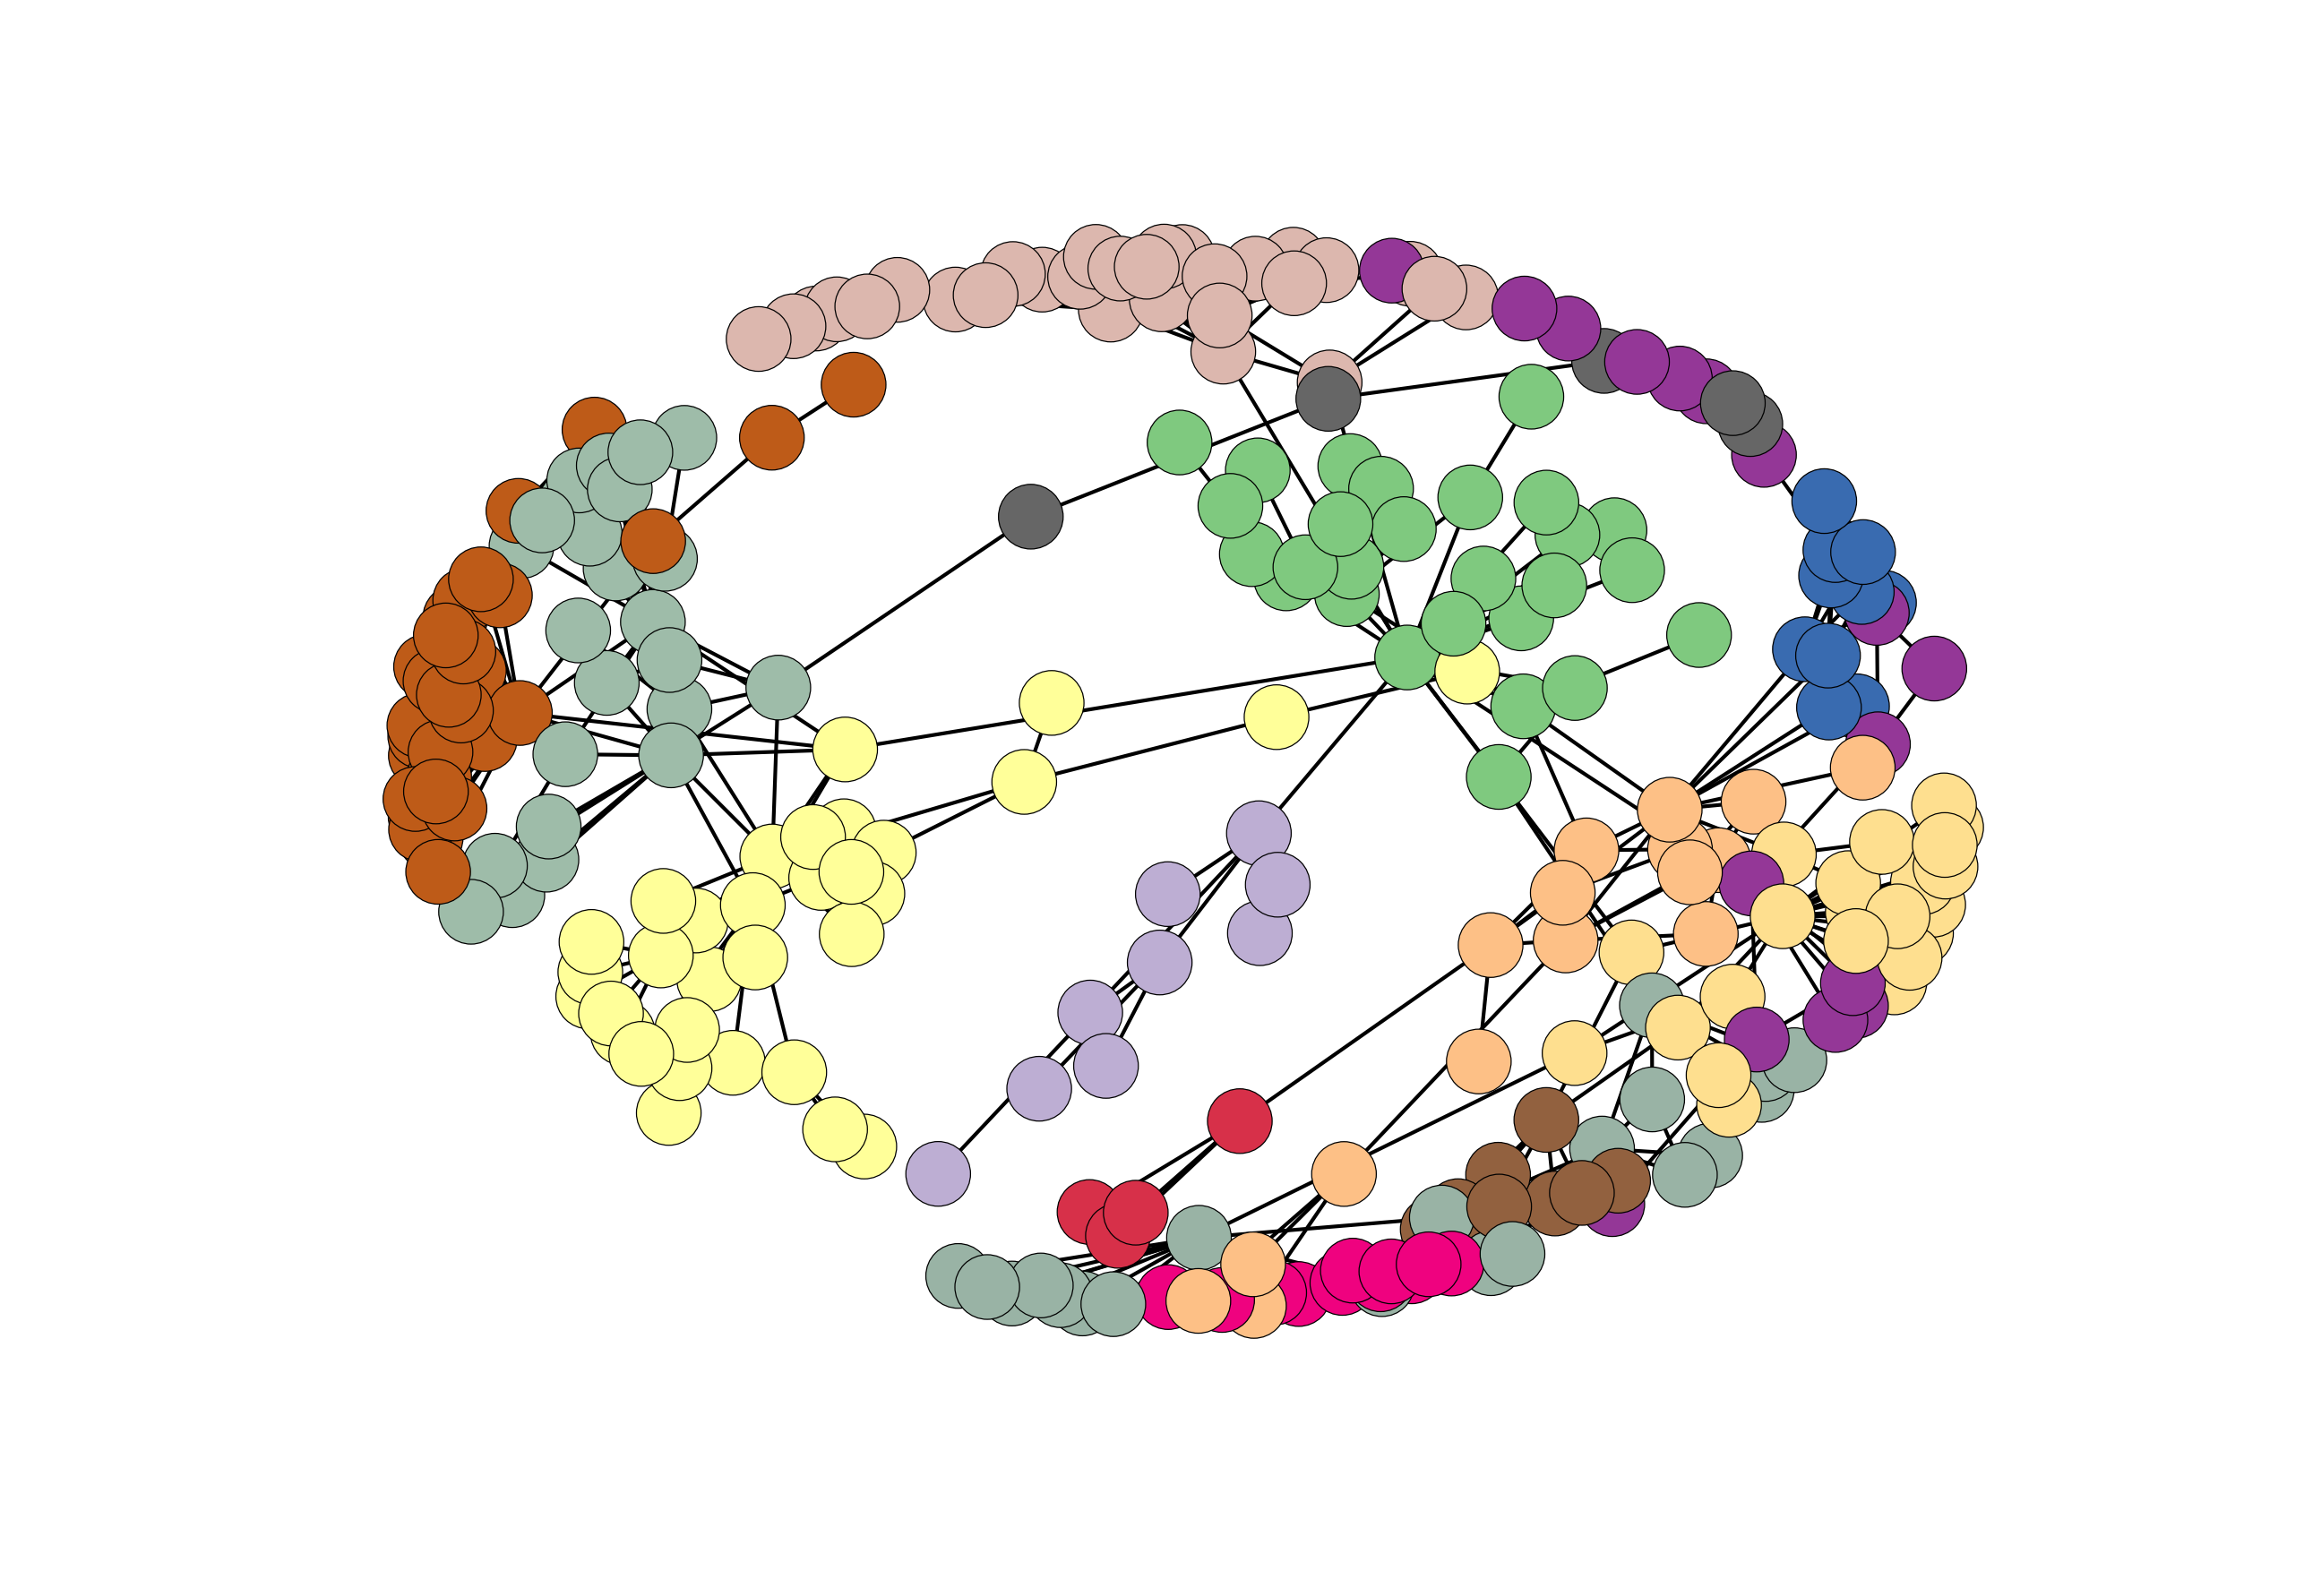

In [10]:
colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant_coauth, node_color=colors , cmap=plt.cm.Accent)
plt.savefig('figures/coauthors_community.pdf')

# Co-Citation

In [11]:
journal_cocite = RC1014.networkCoCitation(coreOnly = True) 
mk.dropEdges(journal_cocite , minWeight = 3)
print(mk.graphStats(journal_cocite))

The graph has 1261 nodes, 1119 edges, 889 isolates, 21 self loops, a density of 0.00140856 and a transitivity of 0.300846


In [12]:
# visualize the giant component only
giantJournal = max(nx.connected_component_subgraphs(journal_cocite), key=len)

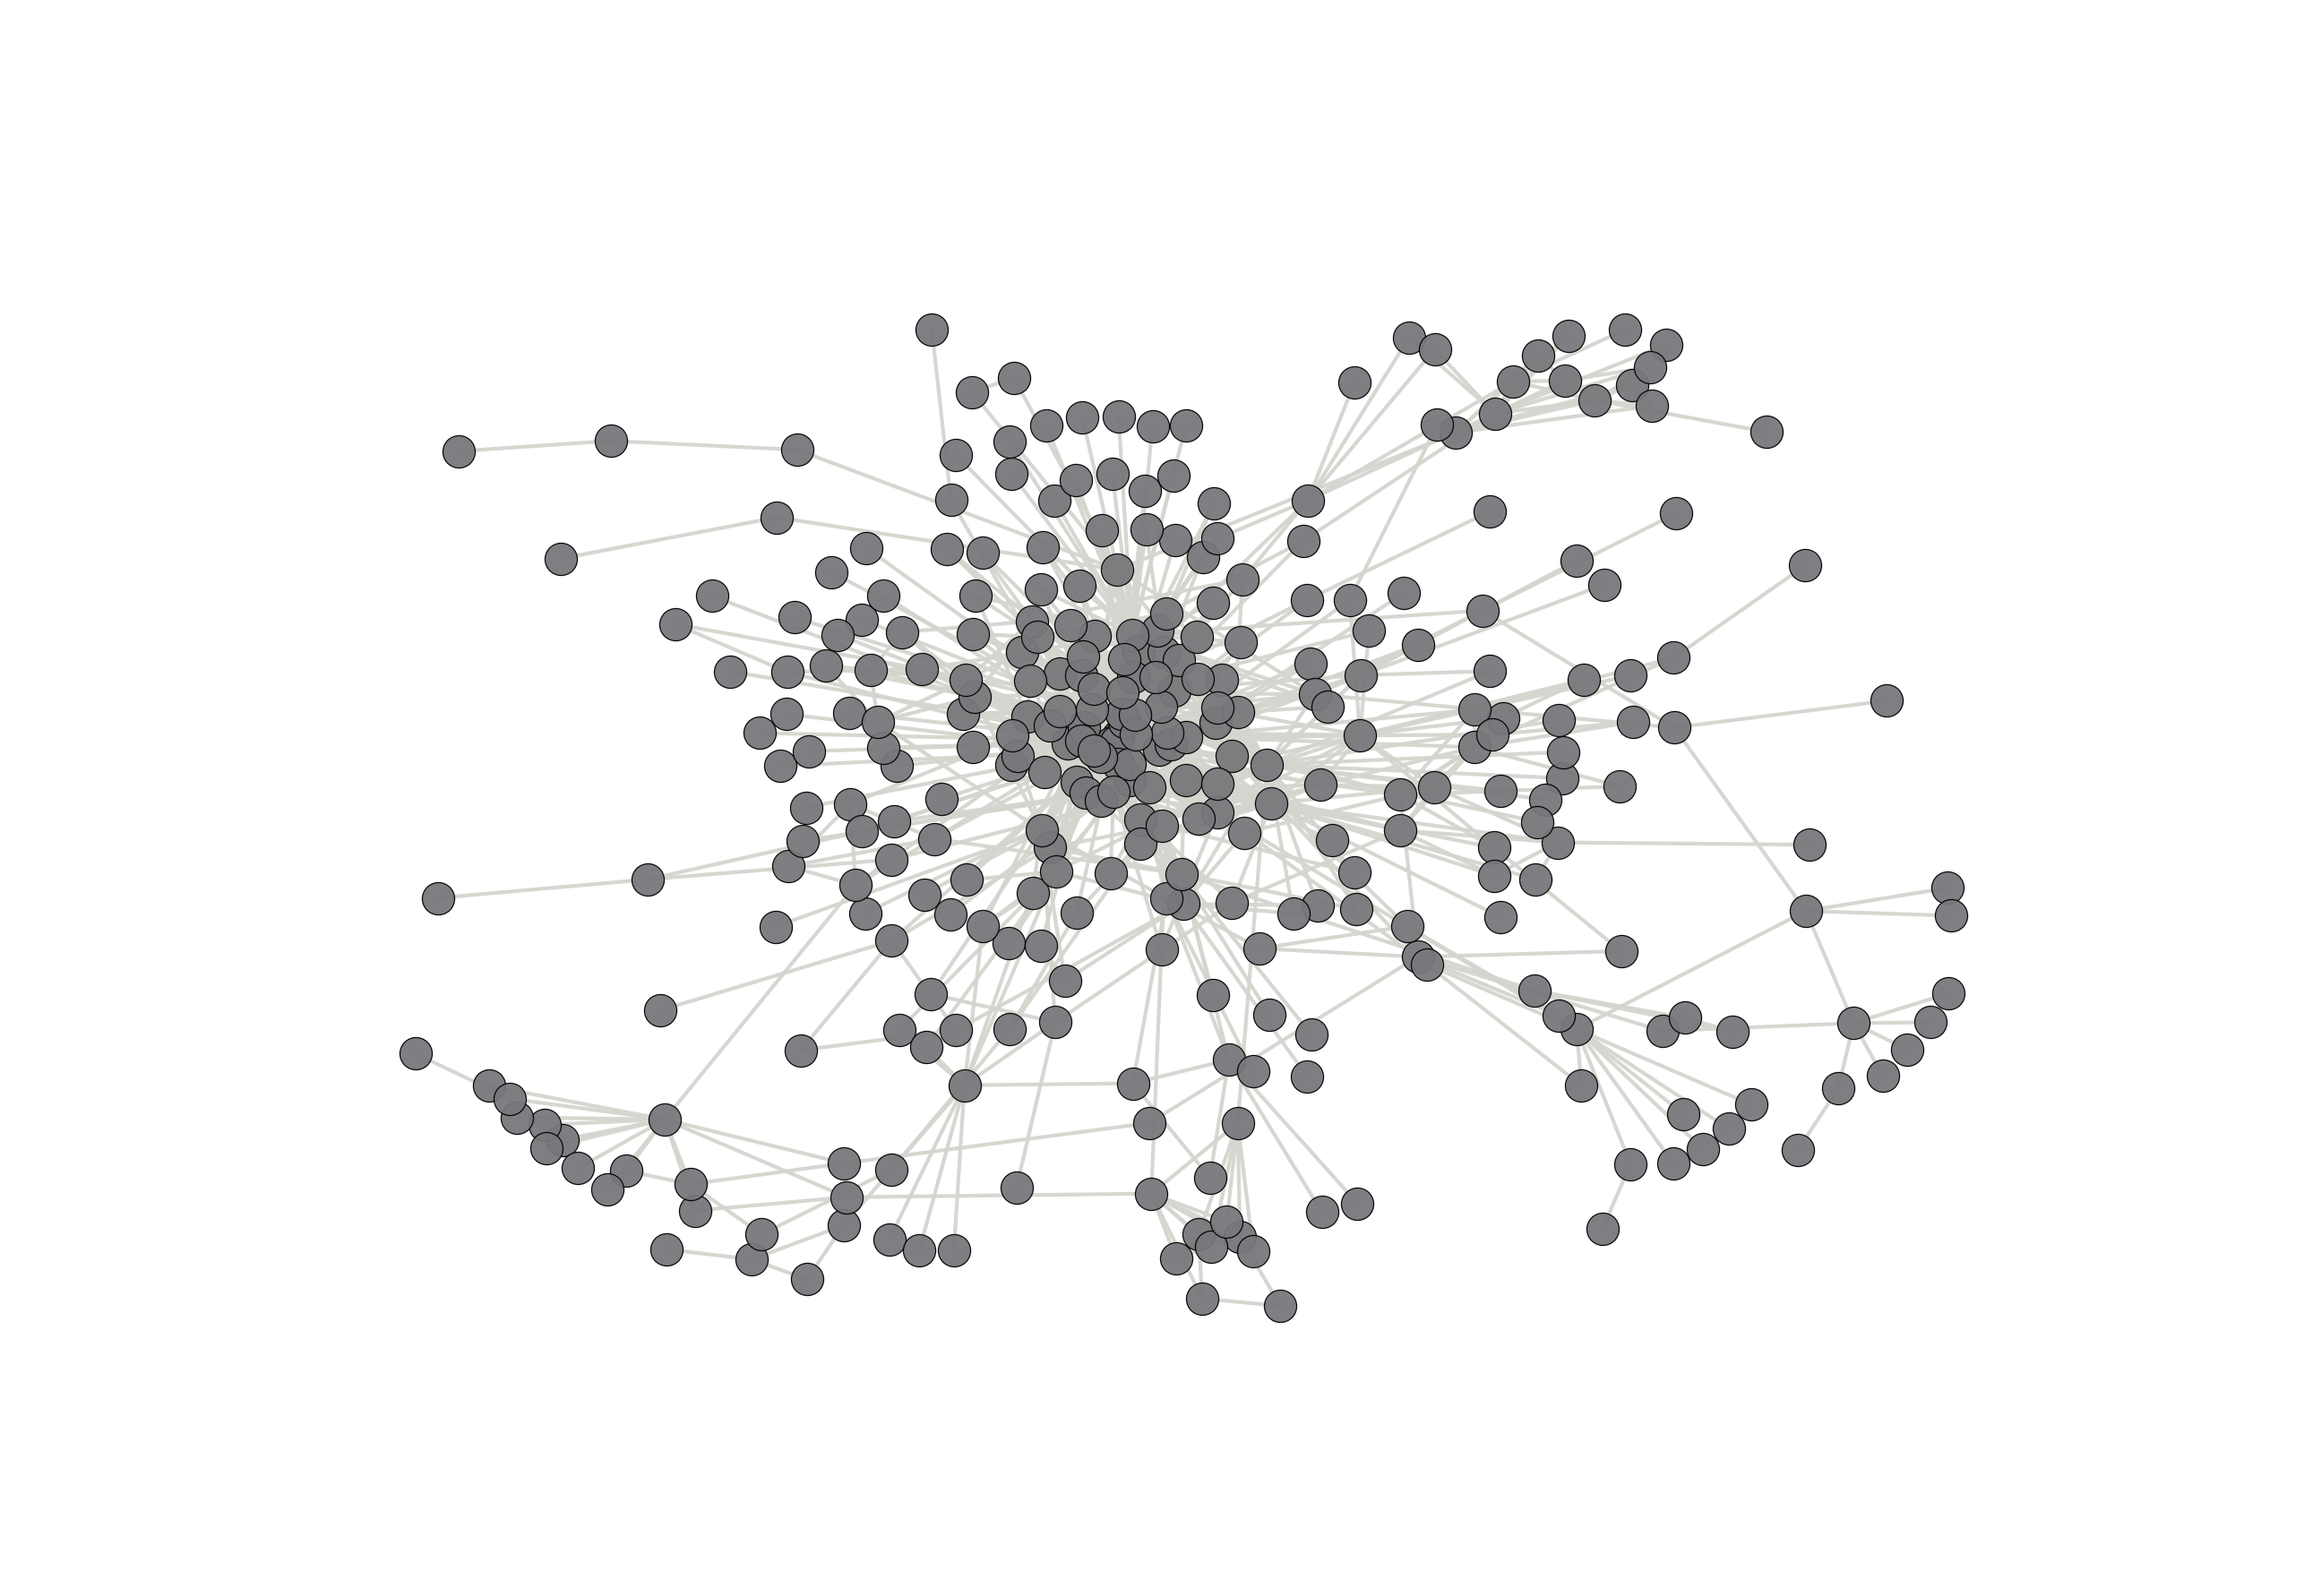

In [13]:
nx.draw_spring(giantJournal, with_labels = False, node_size = 75, 
              node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_journal_cocite.pdf')

Modularity: 0.8392105301376751


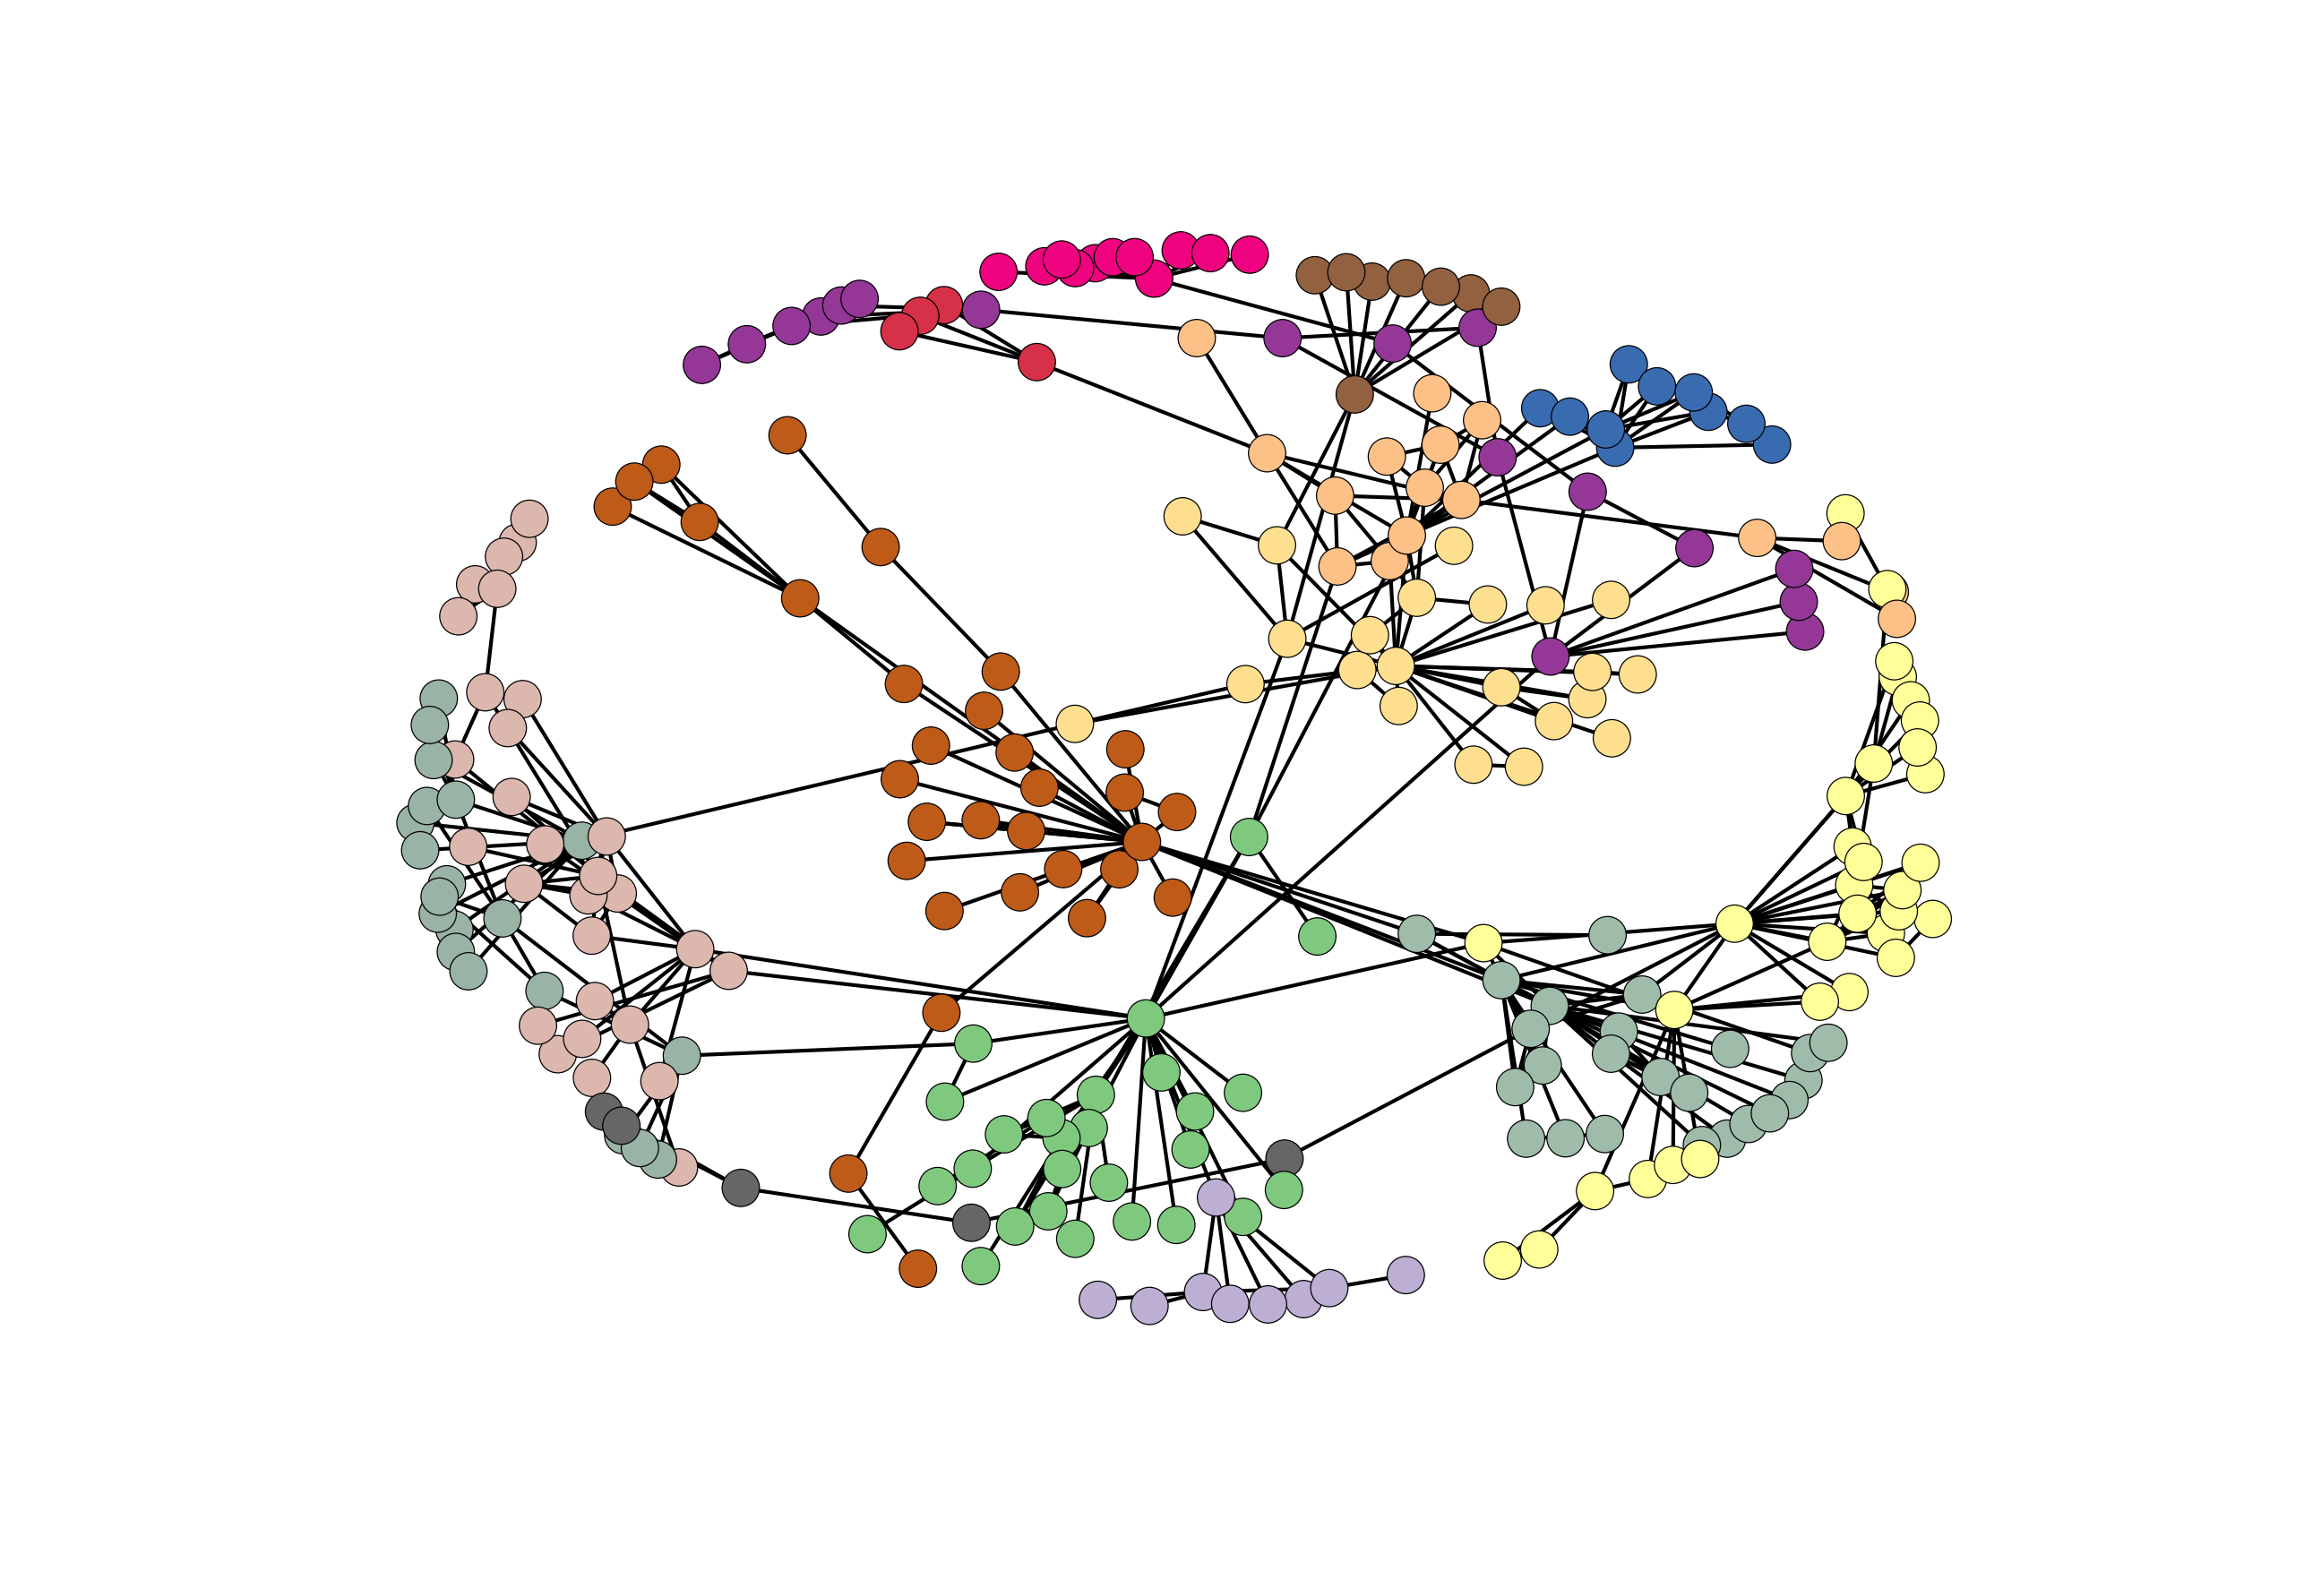

In [14]:
partition = community.best_partition(giant_coauth) 
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant_coauth, node_color=colors, with_labels = False, cmap=plt.cm.Accent, node_size = 100)
plt.savefig('figures/network_journal_cocite_community.pdf')

# Co-Investigator Networks

In [15]:
nserc_grants = mk.GrantCollection('raw_data/grants/nserc/')
print('There are', len(nserc_grants), 'Grants in this Grant Collection.')

There are 71184 Grants in this Grant Collection.


In [16]:
ci_nets = nserc_grants.networkCoInvestigator()
print(mk.graphStats(ci_nets))

The graph has 6498 nodes, 121799 edges, 439 isolates, 4 self loops, a density of 0.00577007 and a transitivity of 0.913699


For this example, we can restrict this network to recurring collaborations within the giant component. This makes plotting easier. In a real research example, you would likely make a different decision. 

In [17]:
mk.dropEdges(ci_nets, minWeight = 4)
giant_ci = max(nx.connected_component_subgraphs(ci_nets), key=len)
print(mk.graphStats(giant_ci))

The graph has 79 nodes, 196 edges, 0 isolates, 0 self loops, a density of 0.0636157 and a transitivity of 0.738872


Modularity: 0.7188651867267893


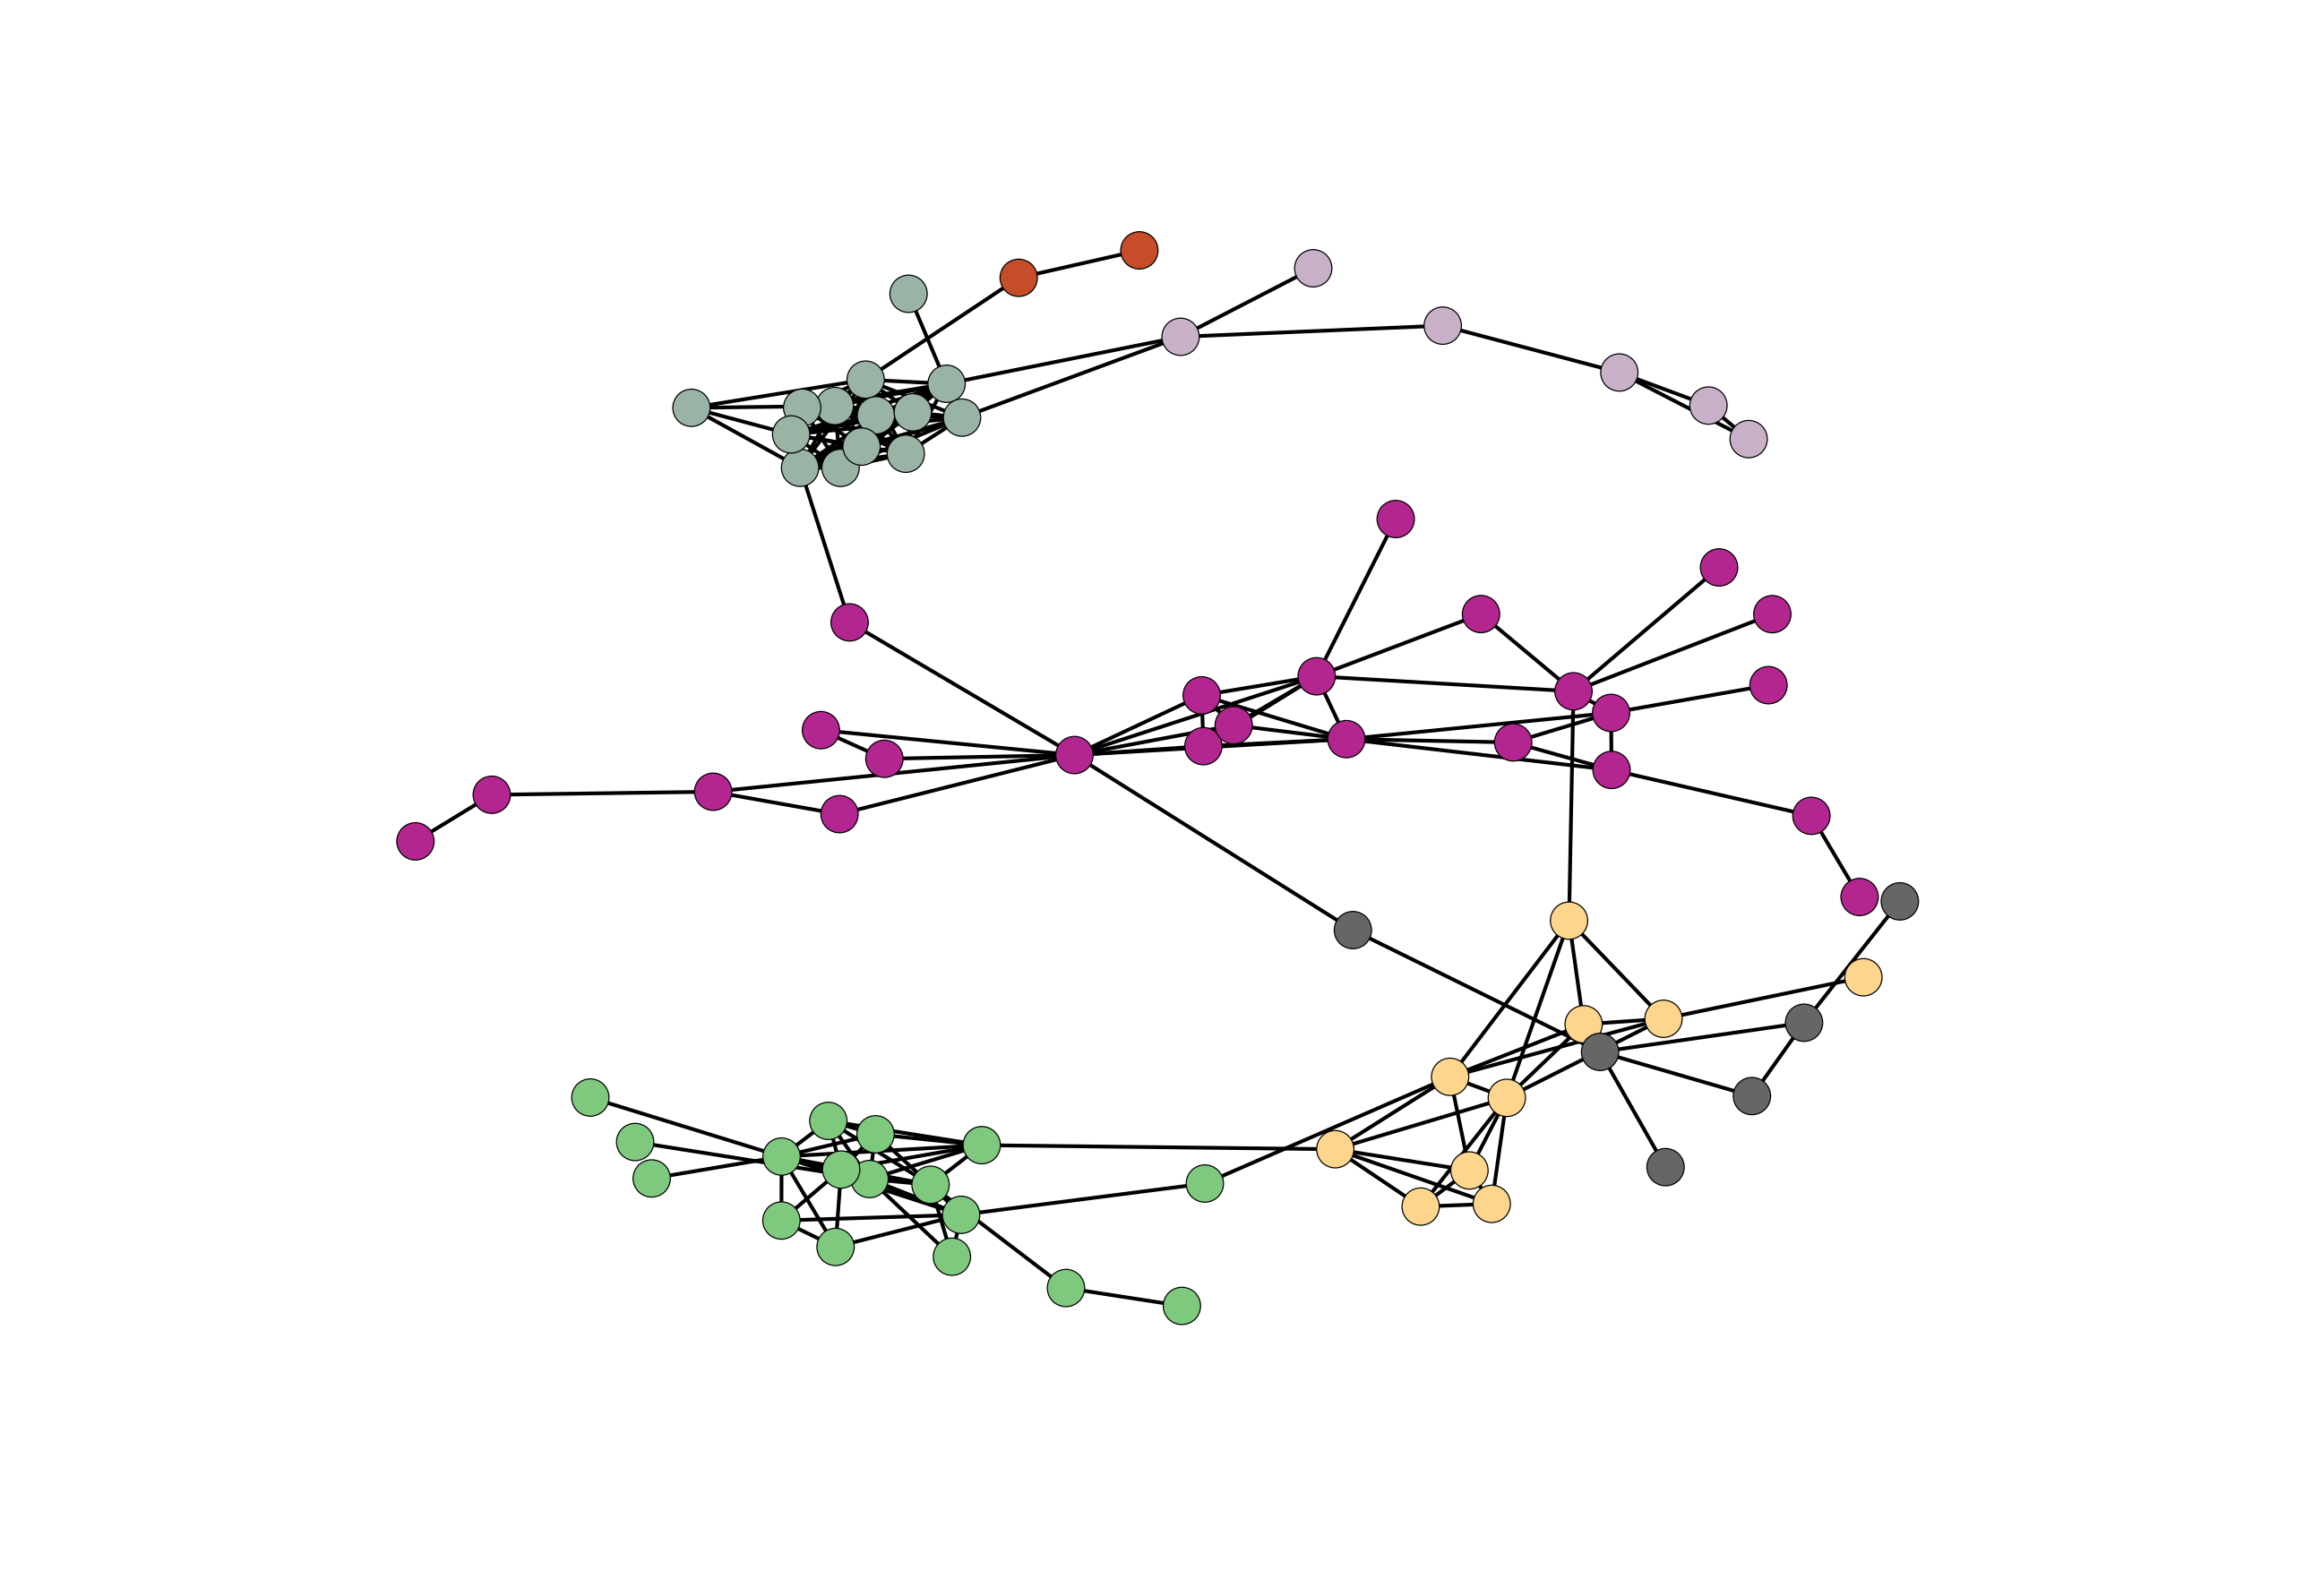

In [18]:
partition_ci = community.best_partition(giant_ci) 
modularity_ci = community.modularity(partition_ci, giant_ci) 
print('Modularity:', modularity_ci)

colors_ci = [partition_ci[n] for n in giant_ci.nodes()] 
nx.draw_spring(giant_ci, node_color=colors_ci, with_labels = False, cmap=plt.cm.Accent, node_size = 100)
plt.savefig('figures/network_coinvestigators.pdf')

We can identify 10 researchers with the highest betweenness centrality scores. 

In [19]:
bet = nx.betweenness_centrality(giant_ci)
bet_df = pandas.DataFrame.from_dict([bet]).transpose()
bet_df.columns = ['betweenness']
bet_df.sort_values(by = ['betweenness'], ascending = False)[:10]

betweenness
Archambault, Philippe     0.607726
Dodson, Julian            0.493506
Ferguson, Steven          0.450216
Edinger, Evan             0.434232
Devillers, Rodolphe       0.410256
Rose, George              0.399850
Gratton, Yves             0.255164
Bell, Trevor              0.190630
Henry, Gregory            0.174640
Stern, Gary               0.140399

In [20]:
inst = nserc_grants.networkCoInvestigatorInstitution() 
print(mk.graphStats(inst))

AttributeError: 'GrantCollection' object has no attribute 'networkCoInvestigatorInstitution'

In [ ]:
deg_inst = nx.degree_centrality(inst)
deg_inst_df = pandas.DataFrame.from_dict([deg_inst]).transpose()
deg_inst_df.columns = ['Degree Centrality']
deg_inst_df.sort_values(by = ['Degree Centrality'], ascending = False)[:15]

In [ ]:
bet_inst = nx.betweenness_centrality(inst)
bet_inst_df = pandas.DataFrame.from_dict([bet_inst]).transpose()
bet_inst_df.columns = ['Betweenness Centrality']
bet_inst_df.sort_values(by = ['Betweenness Centrality'], ascending = False)[:15]

In [ ]:
eig_inst = nx.degree_centrality(inst)
eig_inst_df = pandas.DataFrame.from_dict([eig_inst]).transpose()
eig_inst_df.columns = ['Eigenvector Centrality']
eig_inst_df.sort_values(by = ['Eigenvector Centrality'], ascending = False)[:15]

# One-Mode Networks (e.g. Keyword Co-Occurance)

Going back to the information science and bibliometrics `record collection`...

In [ ]:
keywords = RC1014.networkOneMode('keywords')
print(mk.graphStats(keywords))

In [ ]:
mk.dropEdges(keywords, minWeight = 10, dropSelfLoops = True) 
mk.dropNodesByDegree(keywords, minDegree = 1, useWeight = False)

keywordsGiant = max(nx.connected_component_subgraphs(keywords), key=len)
print(mk.graphStats(keywordsGiant))

In [ ]:
eig = nx.eigenvector_centrality(keywordsGiant)
size = [2000 * eig[node] for node in keywordsGiant]

nx.draw_spring(keywordsGiant, with_labels = False, node_size = size, 
               node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_keywords.pdf')

# Two-Mode Networks

In [ ]:
two_mode = RC1014.networkTwoMode('keywords', 'authorsFull') 
mk.dropEdges(two_mode, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(two_mode, minDegree = 1, useWeight = False)

two_mode = max(nx.connected_component_subgraphs(two_mode), key=len)
print(mk.graphStats(two_mode))

In [ ]:
deg = nx.degree_centrality(two_mode)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(two_mode, with_labels = False, node_size = size, 
               node_color = '#77787B', edge_color = "#D4D5CE", alpha = .95)

# Multi-Level Networks

In [ ]:
multilevel = RC1014.networkMultiLevel('keywords', 'authorsFull')
mk.dropEdges(multilevel, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(multilevel, minDegree = 1, useWeight = False)

multilevelGiant = max(nx.connected_component_subgraphs(multilevel), key=len)
print(mk.graphStats(multilevelGiant))

In [ ]:
deg = nx.degree_centrality(multilevelGiant)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(multilevelGiant, with_labels = False, node_size = size, 
               node_color = '#77787B', edge_color = "#D4D5CE", alpha = .95)

# Writing Networks to Disk

In [ ]:
mk.writeGraph(inst , 'generated_datasets/institutional_collaboration_network/')

# Interactive Network Visualizations with *mkD3*

To change the type of network that is being visualized, you can change two variables in the next cell.
- **`networkType`** should be set to `Citation`, `CoCitation`, or `CoAuthor`.
- **`nodeType`** should be set to `full`, `author`, `journal`, or `year`. (`full` nodes are individual articles or books)

In [23]:
# Variables to Set
# ****************
networkType = "CoCitation"
nodeType = "full"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC1014.networkCoCitation(nodeType = nodeType, coreOnly=True)
    directed = False
elif networkType == "CoAuthor":
    net = RC1014.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC1014.networkCitation(nodeType=nodeType, coreOnly=True)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
mk.dropEdges(net, minWeight = 2, dropSelfLoops = True) 
net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)

mk.writeGraph(net, "generated_datasets/network")

# Create the citations file 
minYear = 1950
maxYear = 2015

years = range(minYear, maxYear+1)

dictionary = {"author": [],
              "journal": [],
              "cite-string": [],
              "num-cites": [],
              "RPY": [],
              "CPY": []}

for i in years:
    try:
        RCyear = RC1014.yearSplit(i, i)
        if len(RCyear) > 0:
            citations = RCyear.getCitations(pandasFriendly=True)
            length = len(citations['year'])
            citations['CPY'] = [i]*length

            dictionary['CPY'] += citations['CPY']
            dictionary['author'] += citations['author']
            dictionary['journal'] += citations['journal']
            dictionary['cite-string'] += citations['citeString']
            dictionary['num-cites'] += citations['num-cites']
            dictionary['RPY'] += citations['year']
    except:
        pass

multi_citations = pandas.DataFrame.from_dict(dictionary)
multi_citations.to_csv("generated_datasets/network_citation.csv")

# Create Link to Heatmap
from IPython.display import display, HTML
display(HTML('<a href="mkD3_static/network.html" target="_blank">Open network graph</a>'))
